### **Importing Libaries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **Importing Data**

In [ ]:
Mobiles = pd.read_csv("/content/Flipkart_Mobiles.csv")

In [ ]:
Mobiles

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990
...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989


### **Making Copy of  Original data**

In [ ]:
df=Mobiles.copy()

In [ ]:
df.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990


In [ ]:
df.tail()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989
3113,SAMSUNG,M52 5G,Sky Blue,8 GB,128 GB,4.2,20350,22595


In [ ]:
df.shape

(3114, 8)

In [ ]:
df.columns

Index(['Brand', 'Model', 'Color', 'Memory', 'Storage', 'Rating',
       'Selling Price', 'Original Price'],
      dtype='object')

In [ ]:
df.describe()

,Rating,Selling Price,Original Price
count,2970.000000,3114.000000,3114.000000
mean,4.243098,26436.625562,28333.473025
std,0.271991,30066.892622,31525.599889
min,2.300000,1000.000000,1000.000000
25%,4.100000,9990.000000,10030.250000
50%,4.300000,15000.000000,16889.500000
75%,4.400000,28999.000000,31500.000000
max,5.000000,179900.000000,189999.000000


In [ ]:
df.describe(include='object')

,Brand,Model,Color,Memory,Storage
count,3114,3114,3114,3071,3075
unique,17,914,639,26,26
top,SAMSUNG,iPhone 11,Black,4 GB,64 GB
freq,719,36,489,750,774


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3114 non-null   object 
 1   Model           3114 non-null   object 
 2   Color           3114 non-null   object 
 3   Memory          3071 non-null   object 
 4   Storage         3075 non-null   object 
 5   Rating          2970 non-null   float64
 6   Selling Price   3114 non-null   int64  
 7   Original Price  3114 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 194.8+ KB


### **Key Observations on Missing Values:**

* **No Nulls in Core Columns:** Essential details like Brand, Model, Color, Selling Price, and Original Price have no missing values, ensuring basic product information is intact.

* **Missing Data in Specifications:** The Memory and Storage columns have 43 and 39 null values respectively, which may require imputation or further investigation.

* **Significant Gaps in Ratings:** With 144 missing ratings, analyses involving customer feedback or product performance might be impacted and should be carefully addressed.







In [ ]:
df.isnull().sum()

,0
Brand,0
Model,0
Color,0
Memory,43
Storage,39
Rating,144
Selling Price,0
Original Price,0


### **Key Observations:**


*   The 144 missing values in the Rating column have been replaced with the mean rating, ensuring no gaps in customer feedback analysis.

*   Since missing ratings were filled instead of dropped, the dataset retains all records for comprehensive analysis.



In [ ]:
df["Rating"].fillna(df["Rating"].mean(),inplace=True)

<ipython-input-13-8459209b477e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Rating"].fillna(df["Rating"].mean(),inplace=True)


In [ ]:
df.isnull().sum()

,0
Brand,0
Model,0
Color,0
Memory,43
Storage,39
Rating,0
Selling Price,0
Original Price,0


### **Key Observations:**


*   Rows with missing values in the Memory and Storage columns have been removed, ensuring that all remaining records have complete specification data.

*   This cleaning step has reduced the overall dataset size, which may be acceptable if the remaining data is sufficient for accurate analysis.



In [ ]:
df.dropna(subset=["Memory","Storage"],inplace=True)

In [ ]:
df.isnull().sum()

,0
Brand,0
Model,0
Color,0
Memory,0
Storage,0
Rating,0
Selling Price,0
Original Price,0


### **Key Observations:**


*   The replacement ensures that all entries follow a uniform format (e.g., "4GB" becomes "4 GB"), reducing inconsistencies in the data.

*   This standardization minimizes potential issues during grouping, filtering, or sorting based on Memory values.



In [ ]:
df['Memory'] = df['Memory'].replace({'4GB':'4 GB'})

In [ ]:
df

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990
...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989


In [ ]:
df.to_csv("Flipkart_Mobiles_Cleaned.csv", index=False)


# **Visualization**

In [ ]:
a=df['Brand'].value_counts()

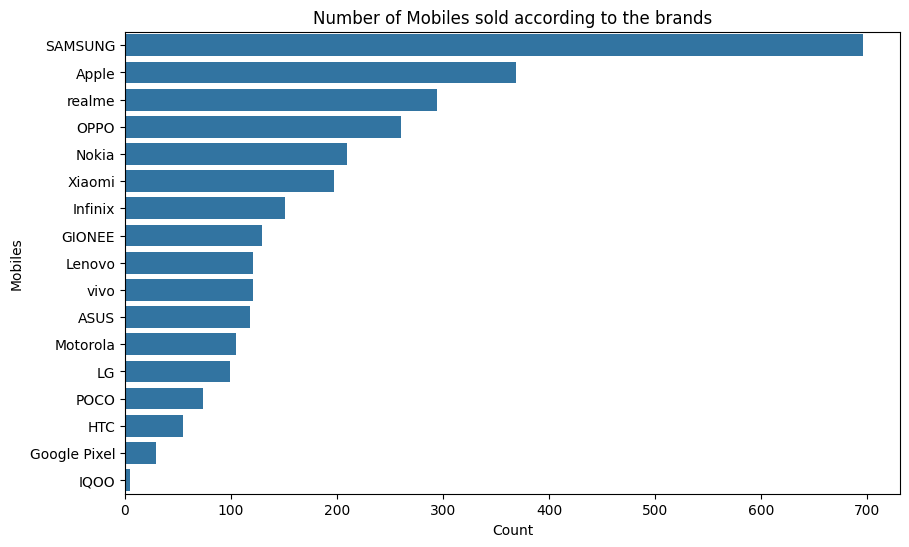

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=a.values,y=a.index)
plt.title('Number of Mobiles sold according to the brands')
plt.xlabel('Count')
plt.ylabel('Mobiles')
plt.show()

In [ ]:
model_counts = df['Model'].value_counts().reset_index()
model_counts.columns = ['Model', 'Count']
top_20_models = model_counts.head(20)
top_20_df = pd.merge(top_20_models, df, on='Model', how='left')

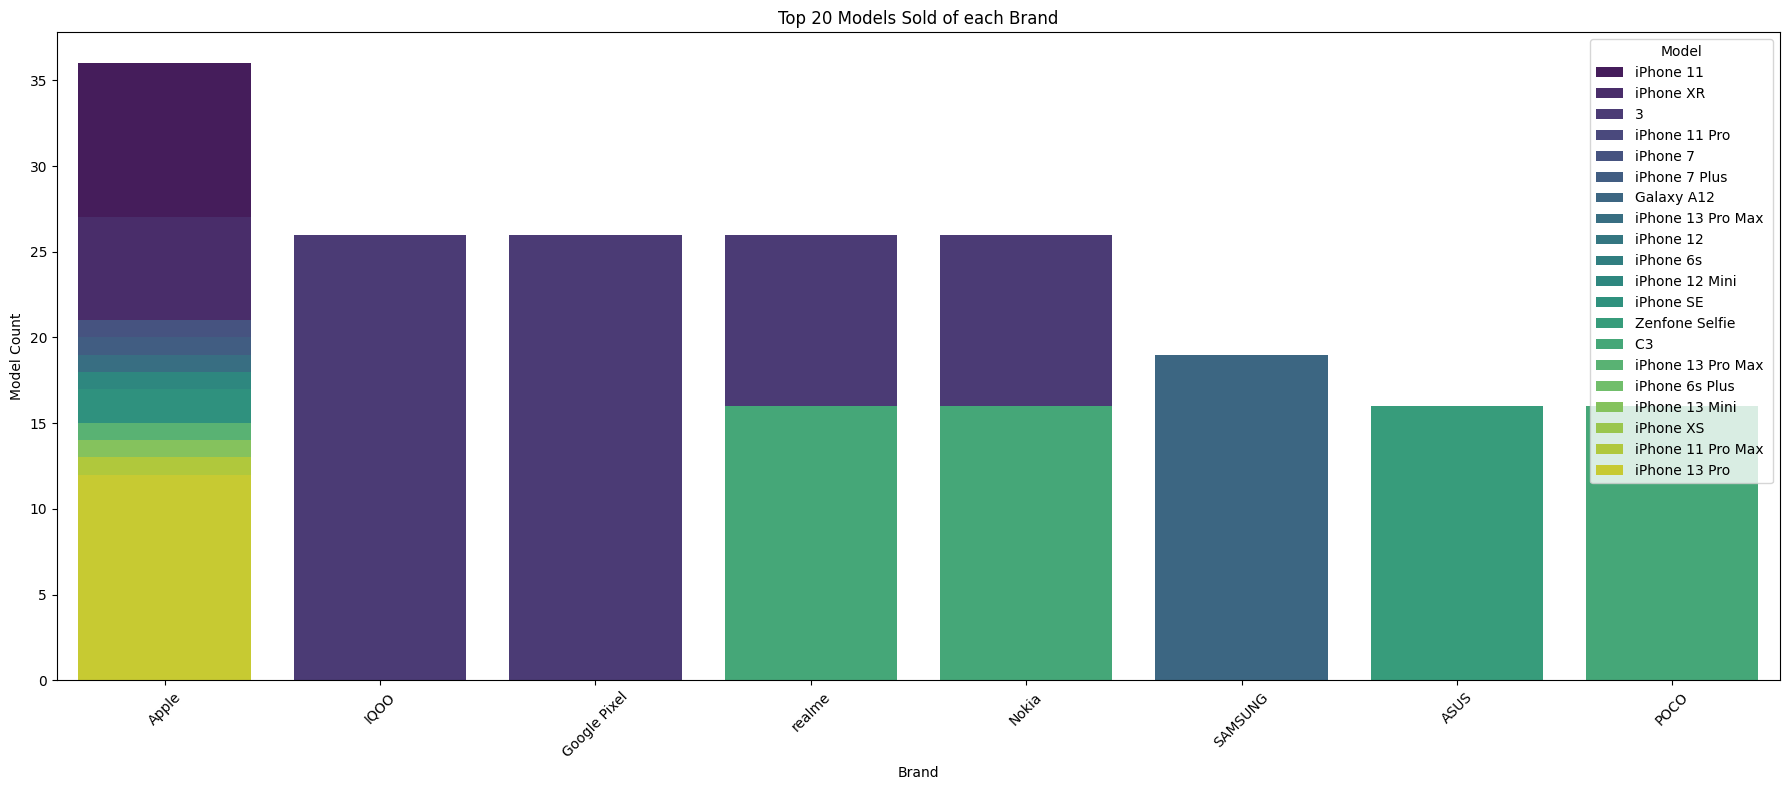

In [ ]:
plt.figure(figsize=(18, 8))
sns.barplot(data=top_20_df, x='Brand', y='Count', hue='Model', dodge=False, palette='viridis')
plt.xlabel('Brand')
plt.ylabel('Model Count')
plt.title('Top 20 Models Sold of each Brand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Model')
plt.show()

In [ ]:
b=df['Color'].value_counts().sort_values(ascending=False).head(10)

<ipython-input-25-58c3dada1a95>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=b.values,y=b.index,palette="dark:#5A9_r")


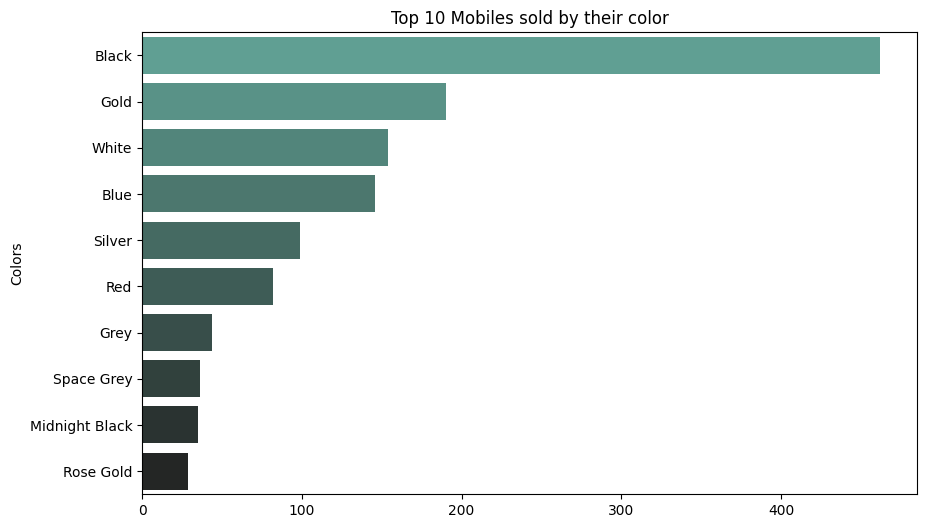

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=b.values,y=b.index,palette="dark:#5A9_r")
plt.title('Top 10 Mobiles sold by their color')
plt.ylabel('Colors')
plt.show()

In [ ]:
asc_memory = df["Memory"].sort_values(ascending=True)
asc_storage = df["Storage"].sort_values(ascending=True)

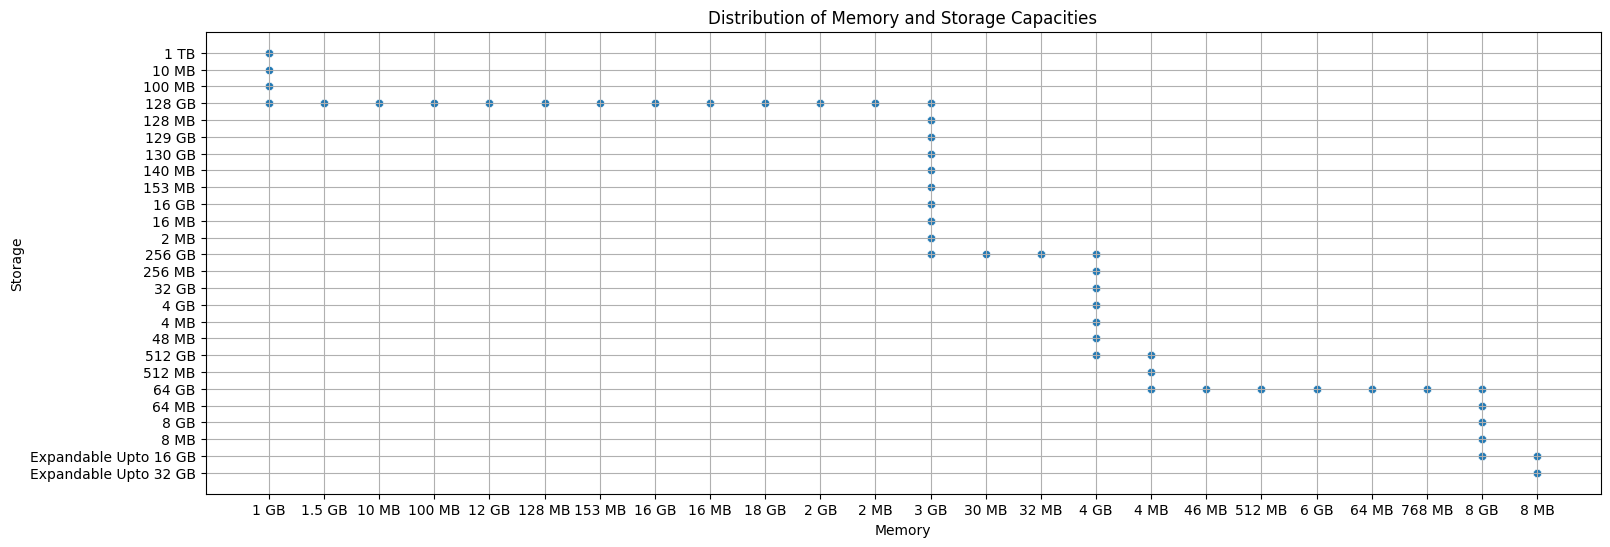

In [ ]:
plt.figure(figsize=(18,6))
sns.scatterplot(data=df, x=asc_memory.values, y=asc_storage.values, marker='o')
plt.title("Distribution of Memory and Storage Capacities")
plt.xlabel('Memory')
plt.ylabel('Storage')
plt.grid(True)
plt.show()

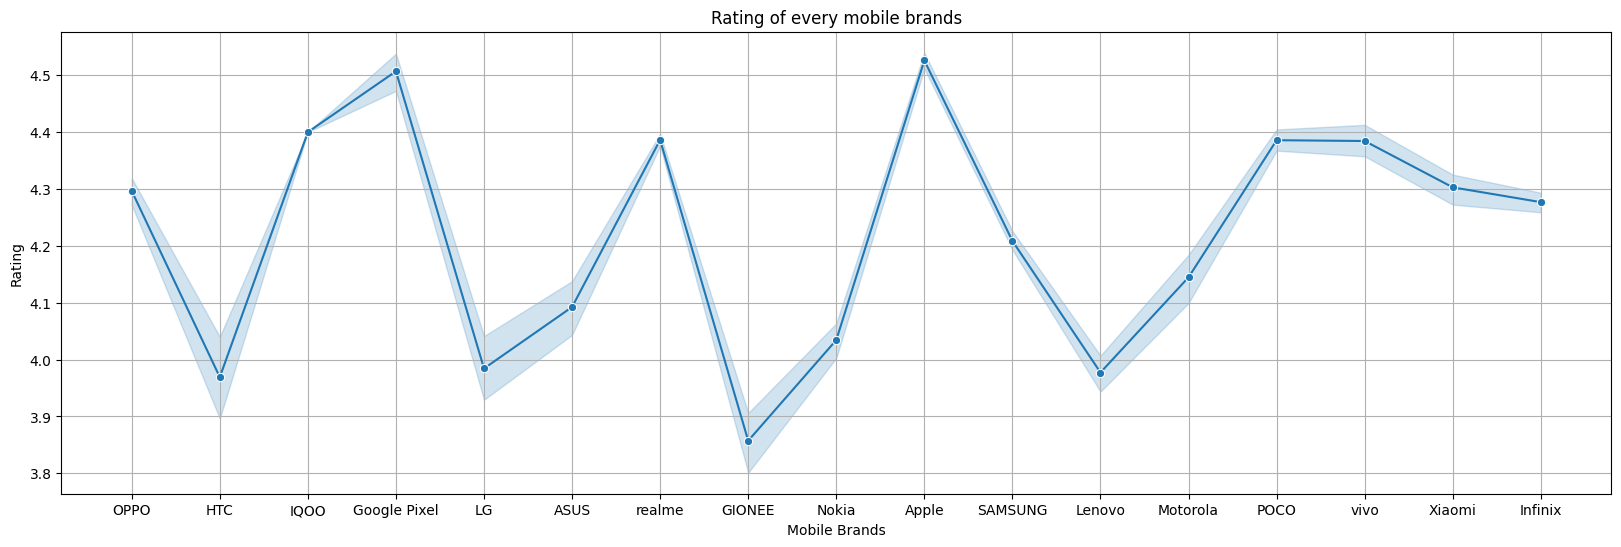

In [ ]:
plt.figure(figsize=(20,6))
sns.lineplot(data=df, x=df['Brand'], y=df['Rating'], marker='o')
plt.title('Rating of every mobile brands')
plt.xlabel('Mobile Brands')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

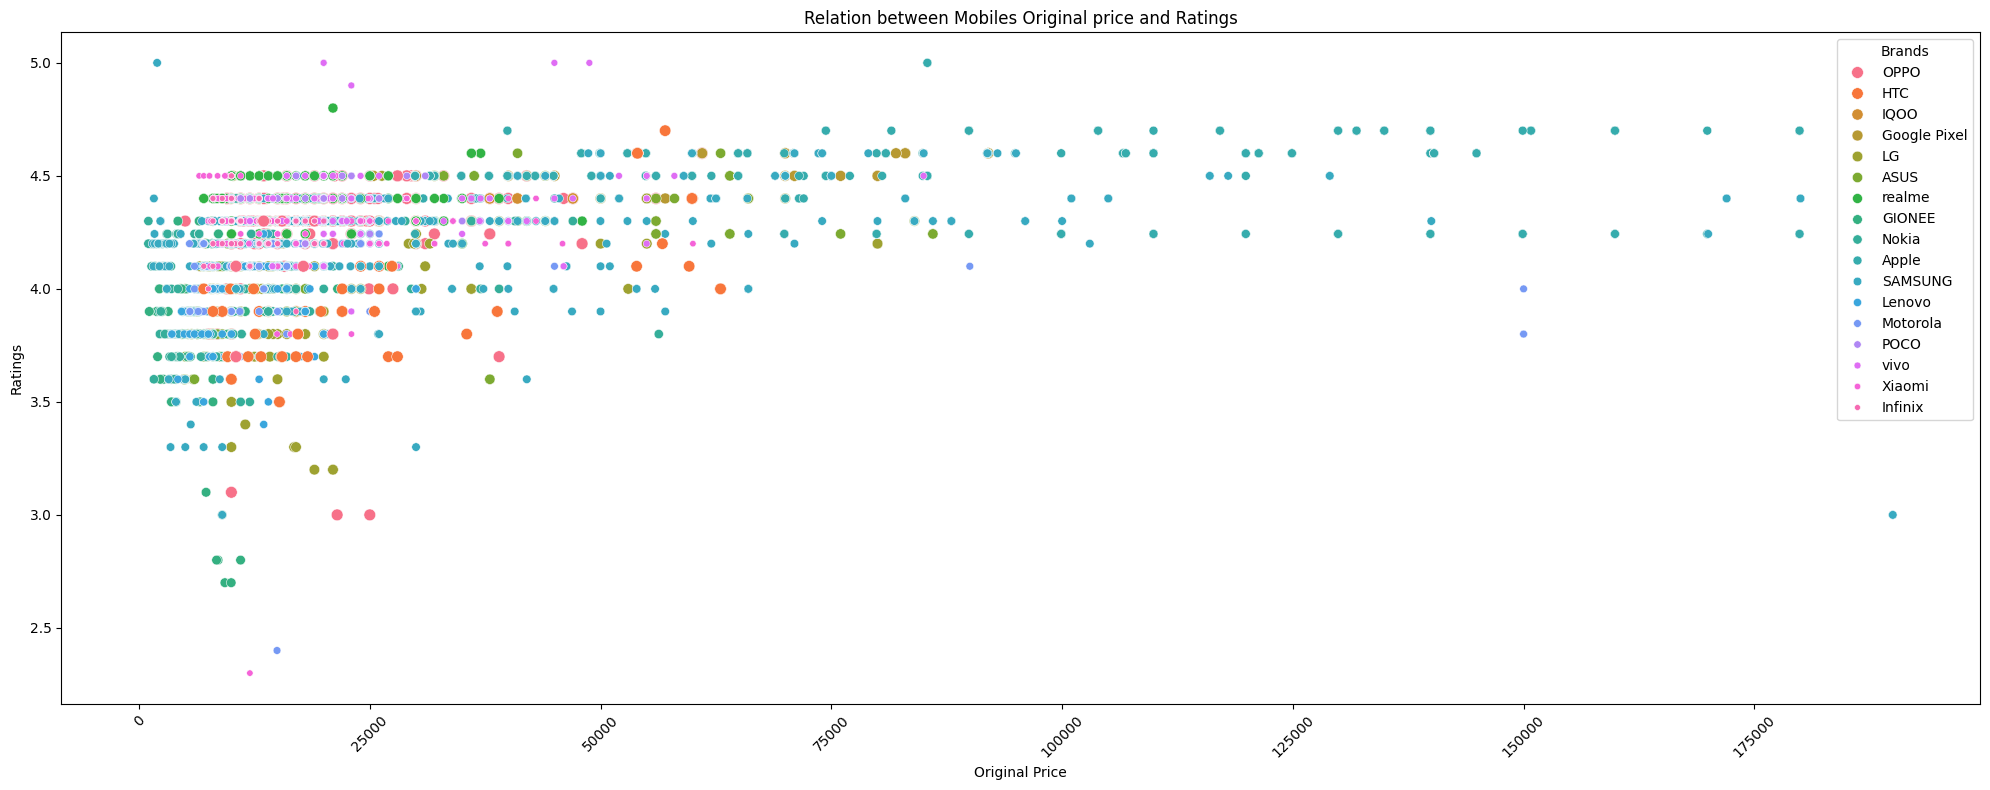

In [ ]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=df, x=df['Original Price'], y=df['Rating'],hue='Brand',size='Brand')
plt.xlabel('Original Price')
plt.ylabel('Ratings')
plt.title('Relation between Mobiles Original price and Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Brands')
plt.show()

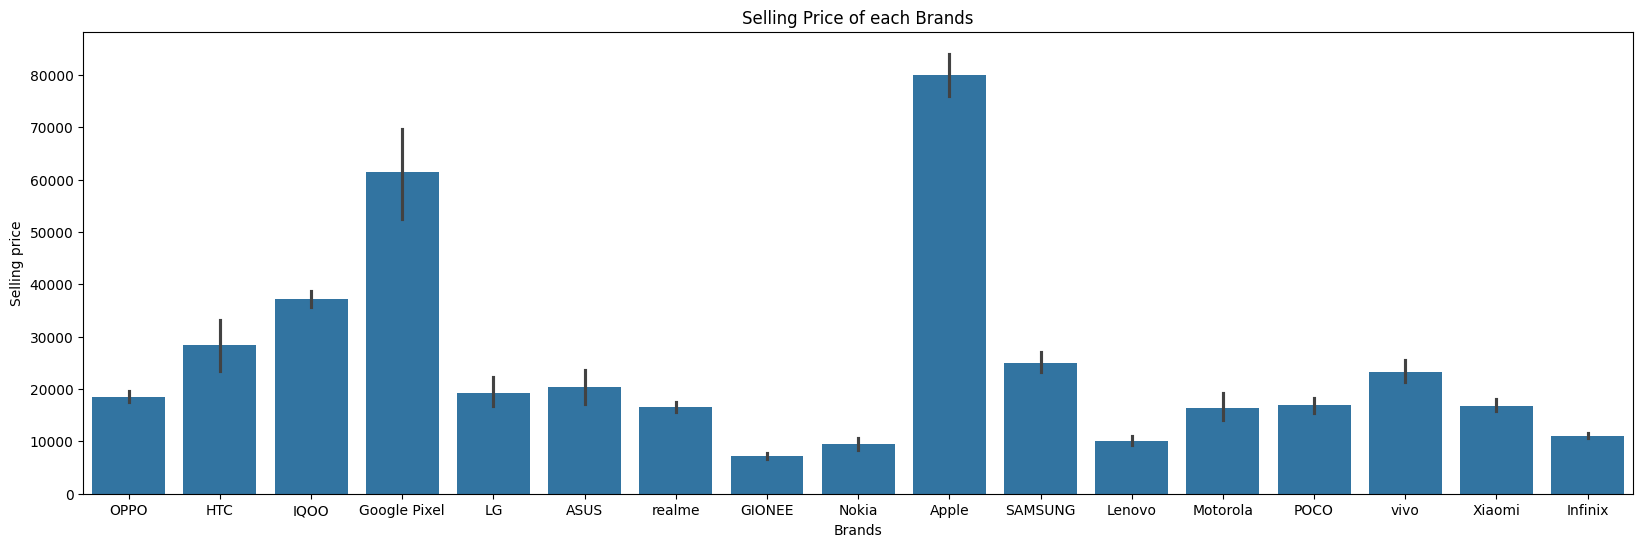

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(data=df,x=df['Brand'],y=df['Selling Price'])
plt.xlabel('Brands')
plt.ylabel('Selling price')
plt.title('Selling Price of each Brands')
plt.show()

In [ ]:
top10_models = (
    df.groupby("Model", as_index=False)["Selling Price"]
      .max()
      .sort_values(by="Selling Price", ascending=False)
      .head(20)
)

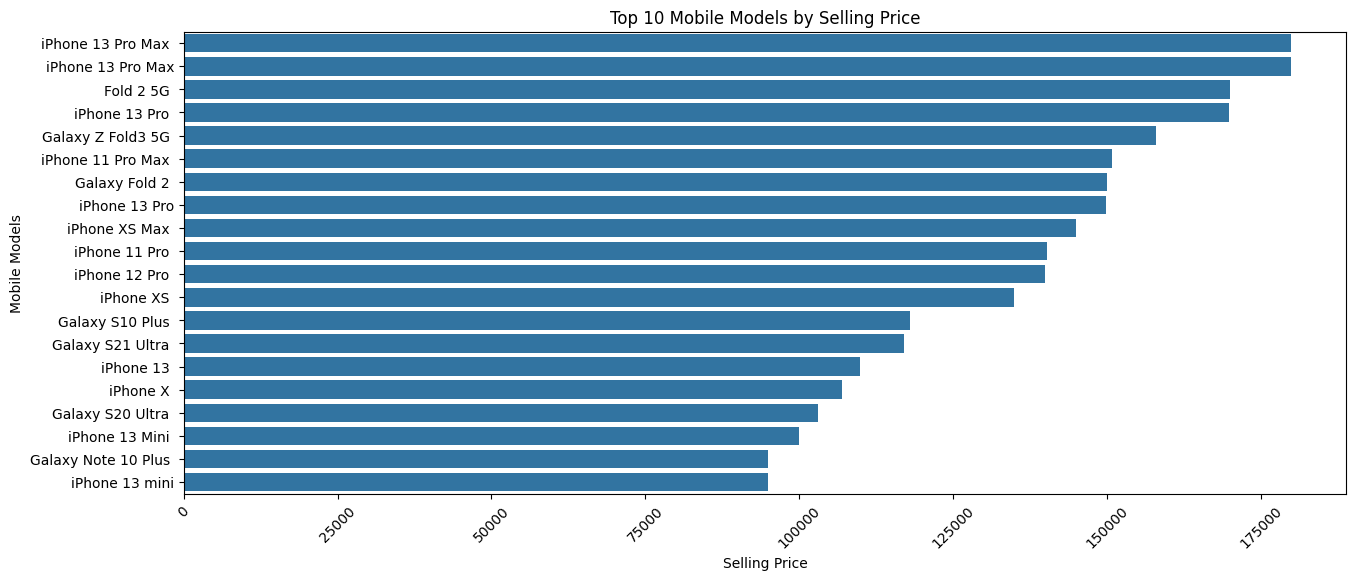

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(data=top10_models, x="Selling Price", y="Model")
plt.xlabel('Selling Price')
plt.ylabel('Mobile Models')
plt.title('Top 10 Mobile Models by Selling Price')
plt.xticks(rotation=45)
plt.show()

In [ ]:
bottom10_models = (
    df.groupby("Model", as_index=False)["Selling Price"]
      .min()
      .sort_values(by="Selling Price", ascending=True)
      .head(20)
)

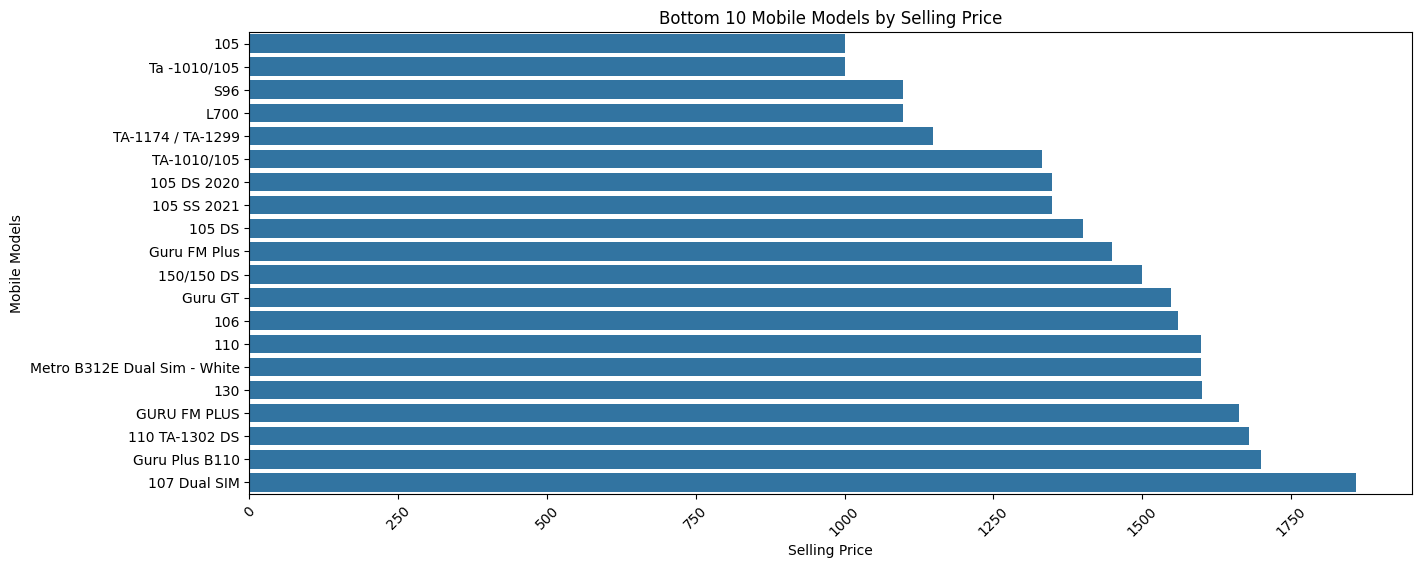

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(data=bottom10_models, x="Selling Price", y="Model")
plt.xlabel('Selling Price')
plt.ylabel('Mobile Models')
plt.title('Bottom 10 Mobile Models by Selling Price')
plt.xticks(rotation=45)
plt.show()

In [ ]:
memory=df.groupby('Memory').agg('count')

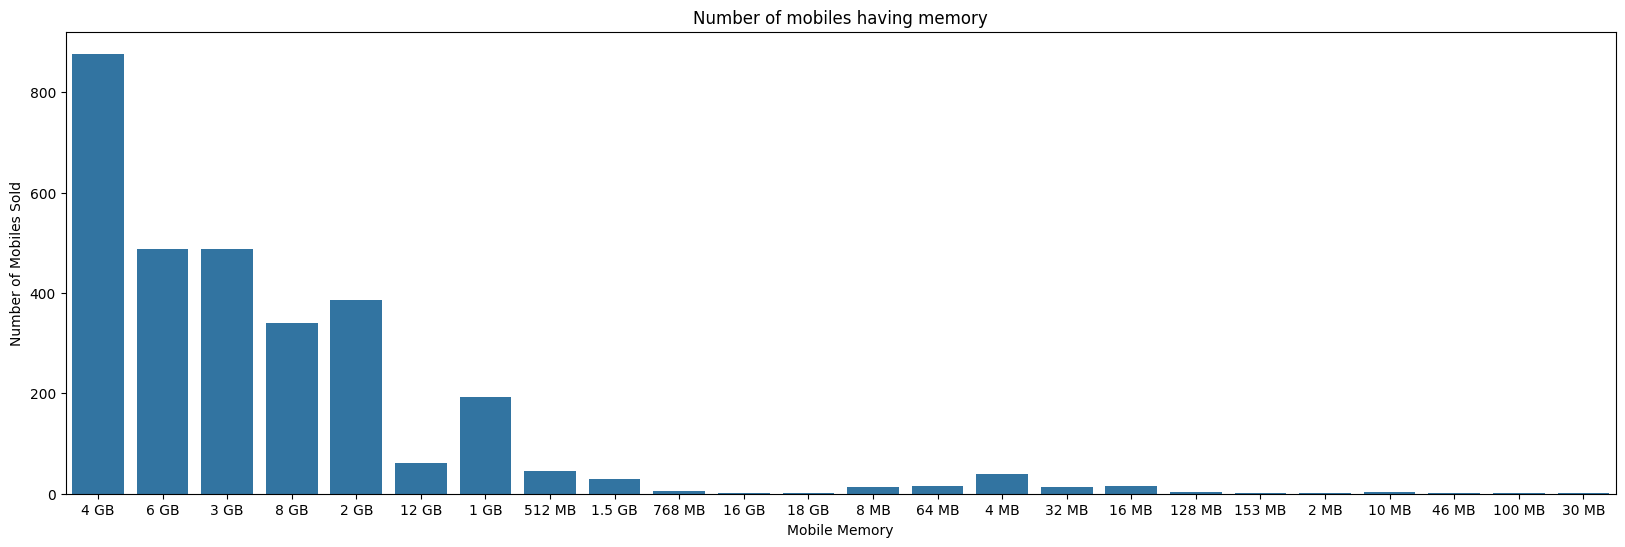

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(data=df,x='Memory')
plt.xlabel('Mobile Memory')
plt.ylabel('Number of Mobiles Sold')
plt.title('Number of mobiles having memory')
plt.show()

In [ ]:
memory=df.groupby('Storage').agg('count')

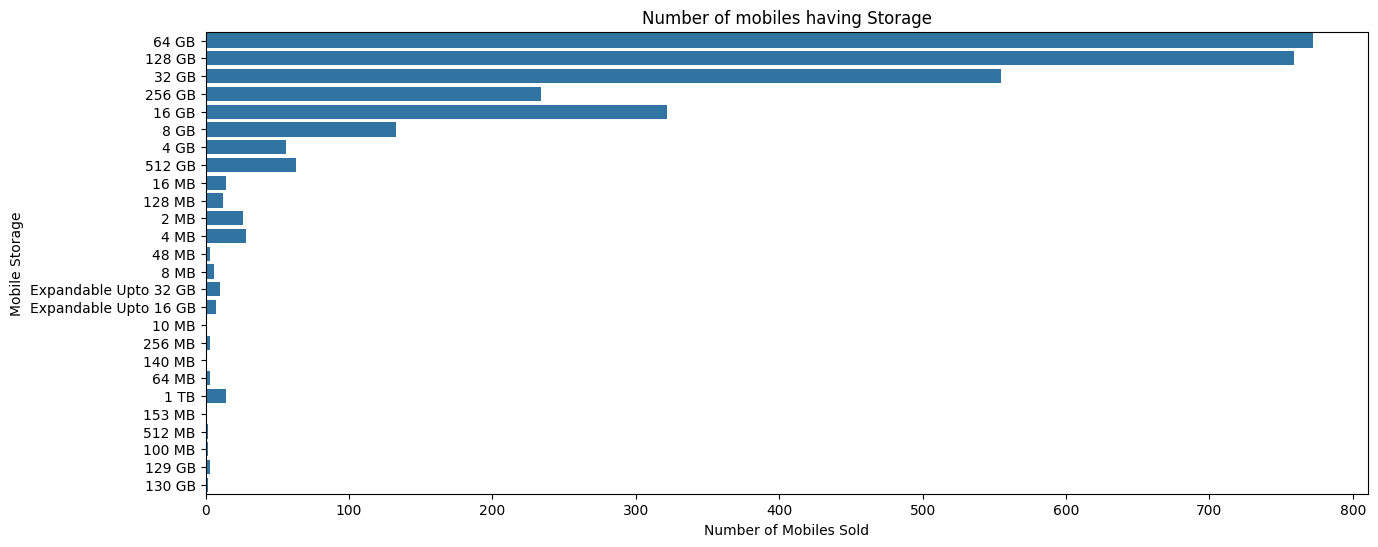

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,y='Storage')
plt.ylabel('Mobile Storage')
plt.xlabel('Number of Mobiles Sold')
plt.title('Number of mobiles having Storage')
plt.show()

In [ ]:
memory = df.groupby('Memory')['Selling Price'].mean()
memory = memory.sort_index(key=lambda col: col.str.extract(r'(\d+)').astype(int)[0]).sort_values(ascending=False)

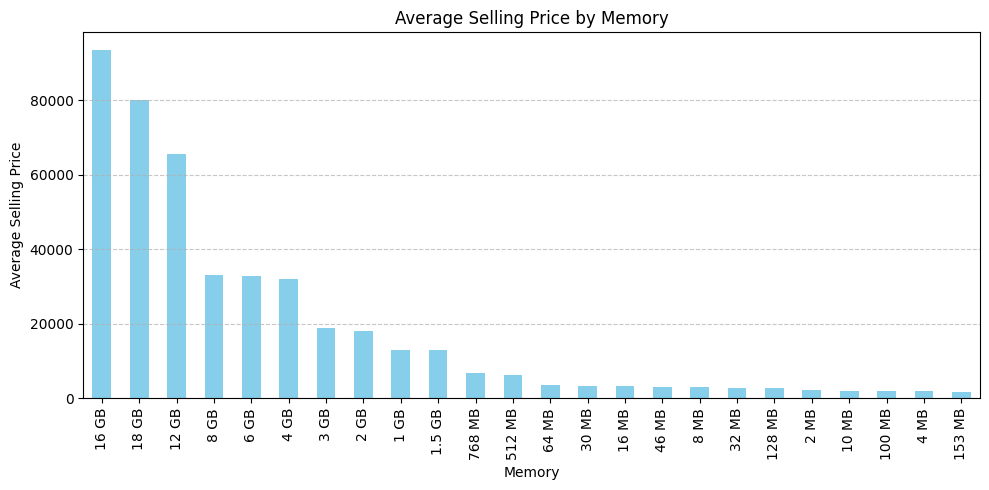

In [ ]:
plt.figure(figsize=(10, 5))
memory.plot(kind='bar', color='skyblue')
plt.xlabel("Memory")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price by Memory")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
storage = df.groupby('Storage')['Selling Price'].mean()
storage = storage.sort_index(key=lambda col: col.str.extract(r'(\d+)').astype(int)[0]).sort_values(ascending=False)

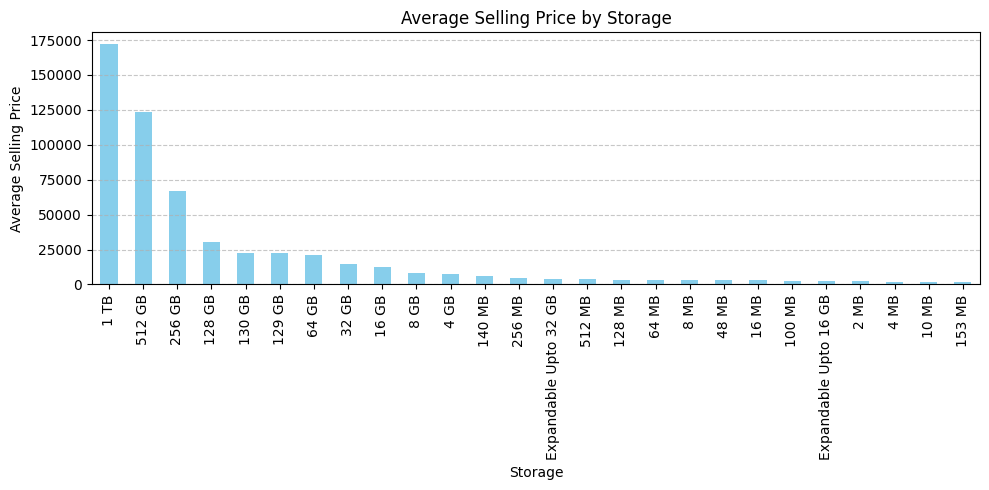

In [ ]:
plt.figure(figsize=(10, 5))
storage.plot(kind='bar', color='skyblue')
plt.xlabel("Storage")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price by Storage")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()